In [12]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.io
import glob,csv

from pykrige.ok import OrdinaryKriging
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [13]:
data=scipy.io.loadmat('Th_part.mat')
NEMO_dep=data['NEMO_dep']
Pa_diss=data['Th_part']
lons=data['lons']
lats=data['lats']
Pa_ini=np.empty([1,31,149,182])

coordinate_name=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/test/EXP00/*ptrc*.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]
dep= coordinate_obj.variables['deptht'];

In [14]:
print len(Pa_diss[0,:])

25


In [18]:
'input boundinglat'
lim=45
latlim=45

#Find variogram model

In [19]:
def find(layer):
        x=lons[layer,:]
        y=lats[layer,:]
        z=Pa_diss[layer,:]
        
        x_ma=np.ma.masked_where(z<= 1e-200,x)
        x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
        y_ma=np.ma.masked_where(z<= 1e-200,y)
        y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
        z_ma=np.ma.masked_where(z<= 1e-200,z)
        z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)   
        m = Basemap(projection='npstere',boundinglat=latlim,lon_0=0,resolution='l')
        
        print x_ma
        print z_ma
        x_dis,y_dis = m(x_ma, y_ma)
        x_lon,y_lat = m(nav_lon, nav_lat)
        a,b=m(0,90)
        
        xx_lon=np.empty([149,182])
        yy_lat=np.empty([149,182])
        xx_dis=np.empty([len(x_dis)])
        yy_dis=np.empty([len(x_dis)])

        for j in range (182):
            for i in range (149):
                xx_lon[i,j]=x_lon[i,j]-a
                yy_lat[i,j]=y_lat[i,j]-b
        
        xx_lon_ma=np.ma.masked_where(nav_lat<45,xx_lon)
        yy_lat_ma=np.ma.masked_where(nav_lat<45,yy_lat)

        xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
        yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
        z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)
        
        for k in range (len(xx_dis)):
            xx_dis[k]=x_dis[k]-a
            yy_dis[k]=y_dis[k]-b        

        xxx_dis=xx_dis.compressed()
        yyy_dis=yy_dis.compressed()
        zzz_ma=z_ma.compressed()
        
        for applen in range(len(xxx_dis)):
            x_all.append(xxx_dis[applen])
        #for applen in range(len(zzz_ma)):
            y_all.append(yyy_dis[applen])
            z_all.append(zzz_ma[applen])

In [20]:
what=np.empty([31,len(Pa_diss[0,:]),len(Pa_diss[0,:])])
            #layer,distance,variance
whatt=np.empty([31,len(Pa_diss[0,:]),len(Pa_diss[0,:])])
x_all=[]#np.empty([31,len(Pa_diss[0,:])])
            #layer,x,y
y_all=[]#np.empty([31,len(Pa_diss[0,:])])
z_all=[]#np.empty([31,len(Pa_diss[0,:])])

for i in range (26):
    find(i)

[-109.     23.     31.     31.     15.     60.    109.    159.     -5.
   30.      9.   -153.    -21.    -51.   -137.   -146.   -173.    174.
    0.   -134.35 -135.3  -136.93 -136.68 -137.   -137.5 ]
[ 0.012       0.02        0.013       0.013       0.175       0.047       0.054
  0.02        0.015       0.048       0.028       0.0359748   0.053       0.015
  0.013       0.0122      0.0146      0.0194      0.0258      0.00325608
  0.00551396  0.00922511  0.0329218   0.01286359  0.01584087]
[-109.     23.     31.     31.     15.     60.    109.    159.     -5.
   30.      9.   -153.    -21.    -51.   -137.   -146.   -173.    174.
    0.   -134.35 -135.3  -136.93 -136.68 -137.   -137.5 ]
[ 0.012       0.0193225   0.013       0.013       0.16884257  0.047       0.054
  0.02        0.015       0.048       0.028       0.03492441  0.053       0.015
  0.013       0.0122      0.01474283  0.0194      0.0258      0.00325608
  0.00551396  0.00922511  0.0329218   0.01286359  0.01584087]
[-109.    

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'linear' Variogram Model
Slope: 2.98918060995e-10
Nugget: 0.000492956823619 



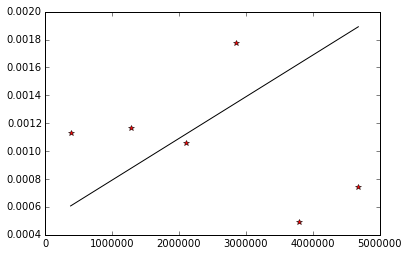

Calculating statistics on variogram model fit...
Q1 = nan
Q2 = nan
cR = nan 

Updating variogram mode...
Using 'linear' Variogram Model
Slope: 6.02761267799e-10
Nugget: 0.000108292524968 



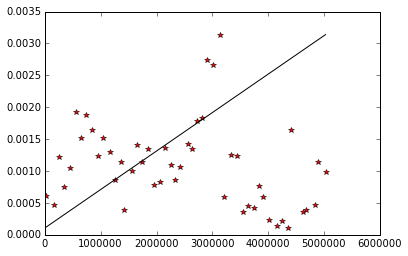

Calculating statistics on variogram model fit...
Q1 = nan
Q2 = nan
cR = nan 



In [22]:
OK = OrdinaryKriging(x_all,y_all, z_all, variogram_model='linear', verbose=True, enable_plotting=True)
OK.update_variogram_model('linear',variogram_parameters=None,nlags=51,anisotropy_angle=0)

In [8]:
'''Input slope and intercept'''

'Input slope and intercept'

In [23]:
slope=6.02761267799e-10
inter=0.000108292524968 

In [24]:
#write a function of  interpolation

def write_nc(layer):
        x=lons[layer,:]
        y=lats[layer,:]
        z=Pa_diss[layer,:]
        x_ma=np.ma.masked_where(z<= 1e-200,x)
        x_ma=np.ma.masked_where(np.isnan(x_ma),x_ma)
        y_ma=np.ma.masked_where(z<= 1e-200,y)
        y_ma=np.ma.masked_where(np.isnan(y_ma),y_ma)
        z_ma=np.ma.masked_where(z<= 1e-200,z)
        z_ma=np.ma.masked_where(np.isnan(y_ma),z_ma)
        
        m = Basemap(projection='npstere',boundinglat=latlim,lon_0=0,resolution='l')
        x_dis,y_dis = m(x_ma, y_ma)
        x_lon,y_lat = m(nav_lon, nav_lat)
        a,b=m(0,90)
        
        xx_lon=np.empty([149,182])
        yy_lat=np.empty([149,182])
        xx_dis=np.empty([len(x_dis)])
        yy_dis=np.empty([len(x_dis)])

        for j in range (182):
            for i in range (149):
                xx_lon[i,j]=x_lon[i,j]-a
                yy_lat[i,j]=y_lat[i,j]-b
        
        xx_lon_ma=np.ma.masked_where(nav_lat<50,xx_lon)
        yy_lat_ma=np.ma.masked_where(nav_lat<50,yy_lat)

        xx_dis=np.ma.masked_where(np.isnan(xx_dis),xx_dis)
        yy_dis=np.ma.masked_where(np.isnan(yy_dis),yy_dis)
        z_ma=np.ma.masked_where(np.isnan(yy_dis),z_ma)
        
        for k in range (len(xx_dis)):
            xx_dis[k]=x_dis[k]-a
            yy_dis[k]=y_dis[k]-b        

        xxx_dis=xx_dis.compressed()
        yyy_dis=yy_dis.compressed()
        zzz_ma=z_ma.compressed()
        
        #print ('zzz_ma %s'%zzz_ma)
        #print ('xxx_dis %s'%xxx_dis)
        #print ('yyy_dis %s'%yyy_dis)
        
        OK = OrdinaryKriging(xxx_dis,yyy_dis, zzz_ma, variogram_model='linear', verbose=False, enable_plotting=False)
        OK.update_variogram_model('linear',variogram_parameters=[slope,inter],nlags=100,anisotropy_angle=0)
        Pa_interp, ss = OK.execute('points',xx_lon, yy_lat)
        Pa_interp=Pa_interp.reshape(149,182)
        #print Pa_interp
        
        fig=plt.figure(figsize=(8, 8)); ax=plt.gca()
        m = Basemap(projection='npstere',boundinglat=latlim,lon_0=0,resolution='l')
        m.drawcoastlines()
        m.fillcontinents(color = '0.95')
        m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
        x,y = m(nav_lon, nav_lat)
        plt.plot(x,y,x.T,y.T,color='k',linewidth=0.1)
        CS = m.pcolor(x[105:-1,:],y[105:-1,:],Pa_interp[105:-1,:],cmap=plt.cm.YlOrBr)#boundary+120
        CBar = plt.colorbar(CS, shrink=0.8)
        #m.scatter(x[0,90],y[0,90],color='yellow',s=100)
        x_mma=x_ma.compressed()
        y_mma=y_ma.compressed()
        for j in range(len(x_mma)):
            x2,y2= m(x_mma[j], y_mma[j])
            cmm = plt.cm.get_cmap('YlOrBr')
            m.scatter(x2,y2,c=zzz_ma[j],vmin=np.min(Pa_interp),vmax=np.max(Pa_interp),cmap=cmm,s=80)
        #fig.savefig('fig%s.pdf'%layer)
        plt.title('Layer %s'%layer)
        
        Pa_ini[-1,layer,:,:]=Pa_interp
        if layer==25:
            Pa_ini[-1,25:-1,:,:]=Pa_interp
            Pa_ini[-1,-1,:,:]=Pa_interp
        plt.show()

#part Pa interpolation_result

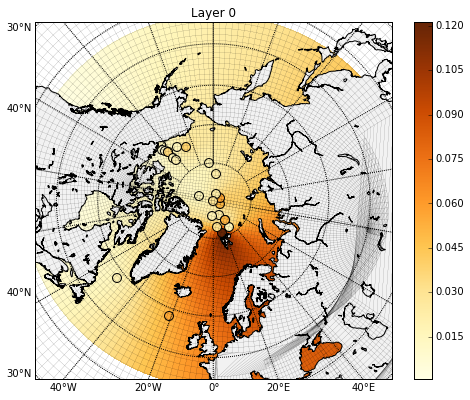

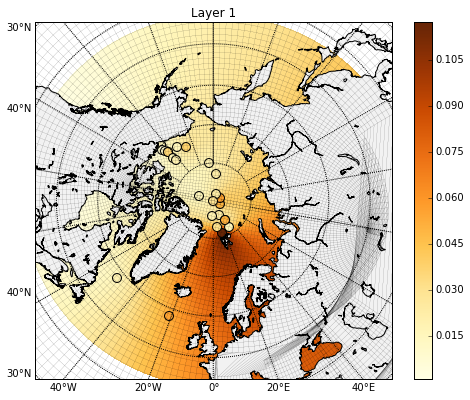

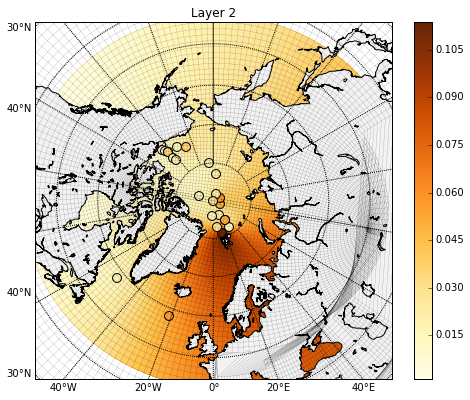

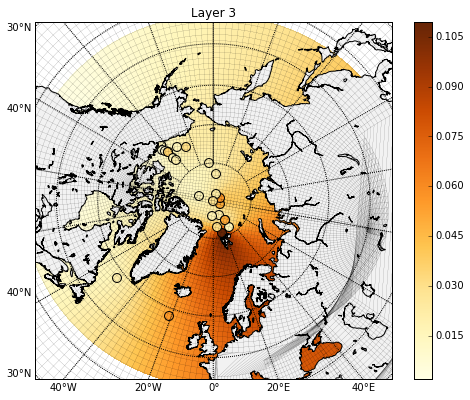

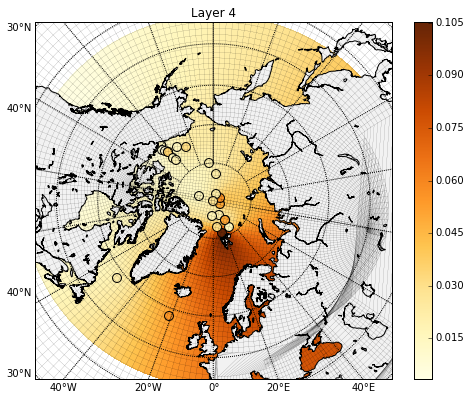

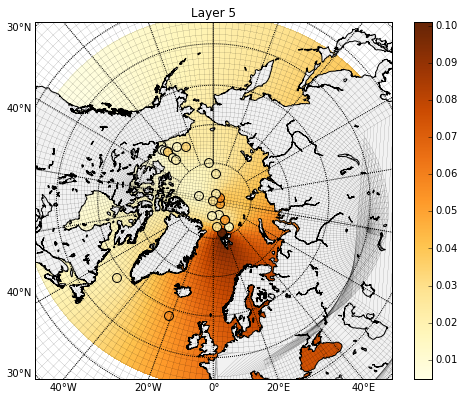

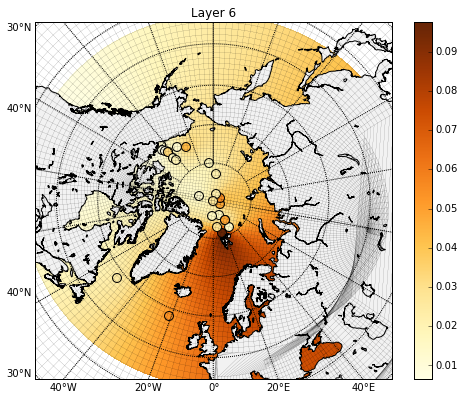

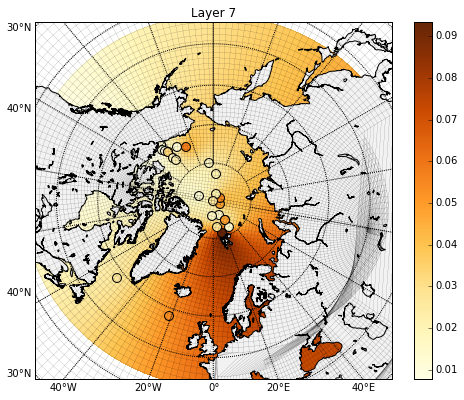

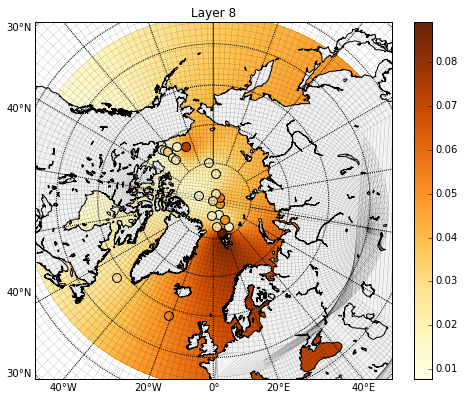

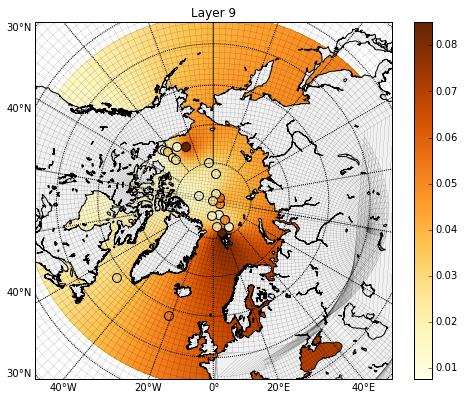

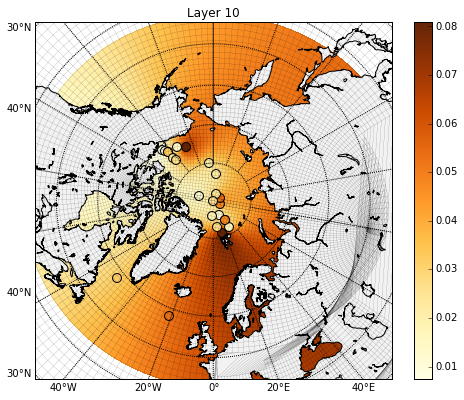

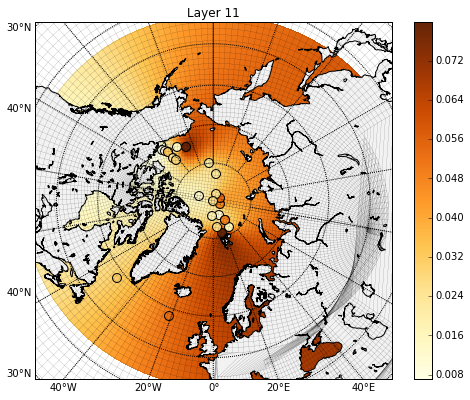

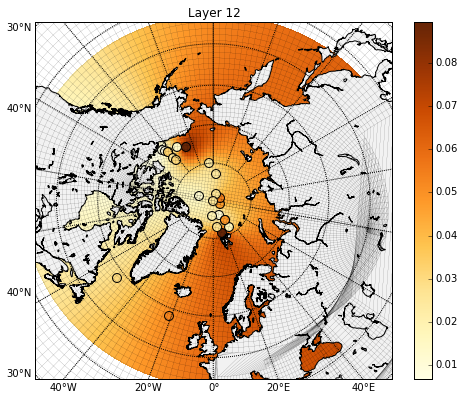

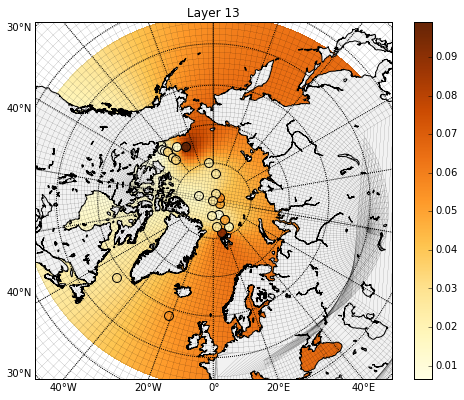

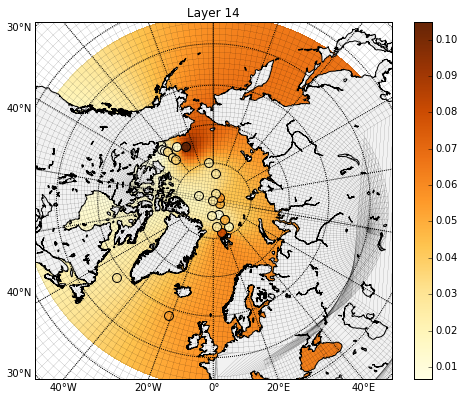

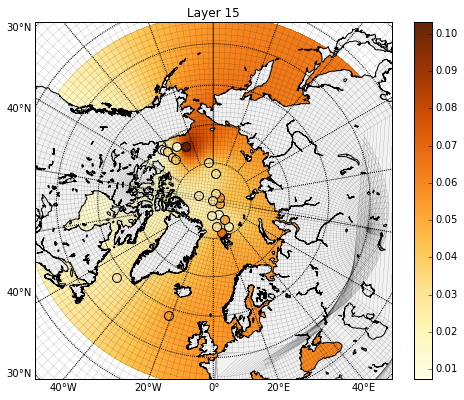

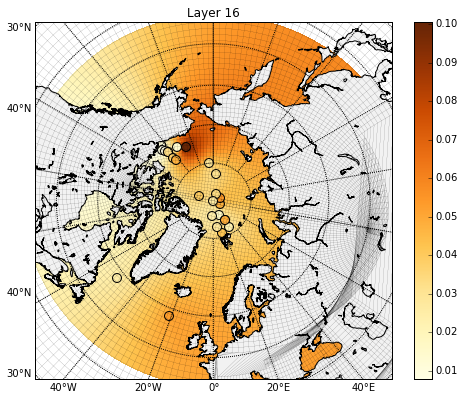

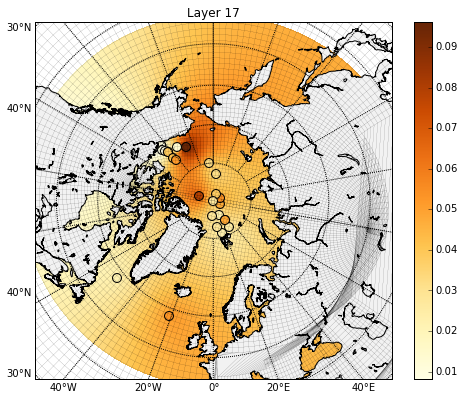

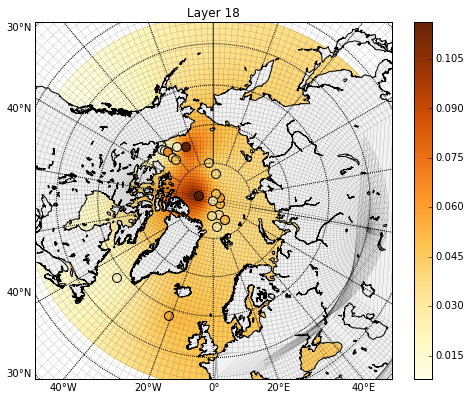

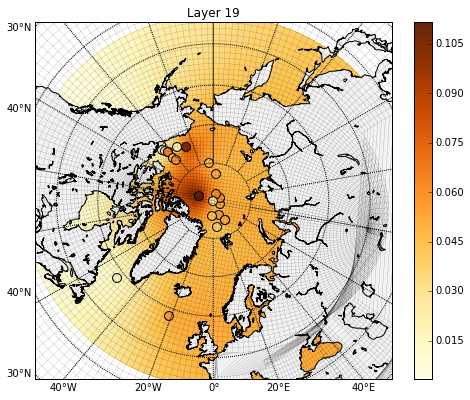

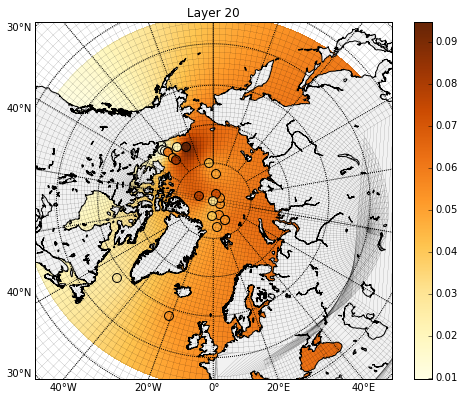

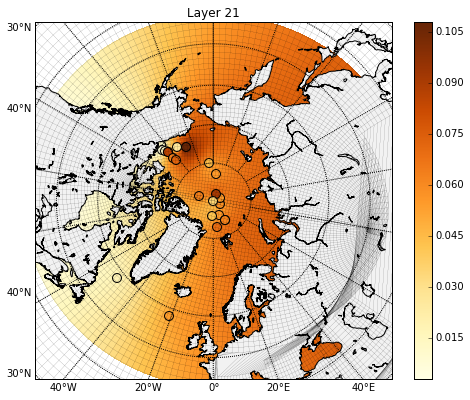

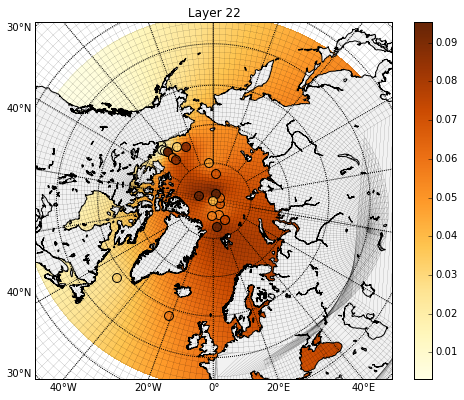

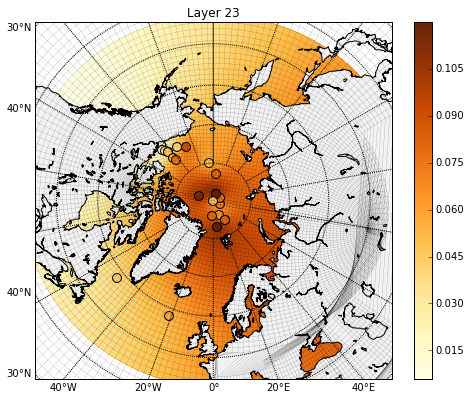

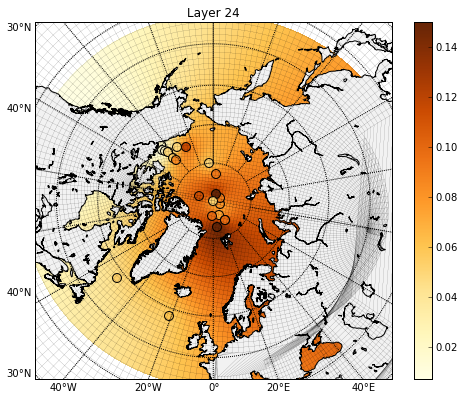

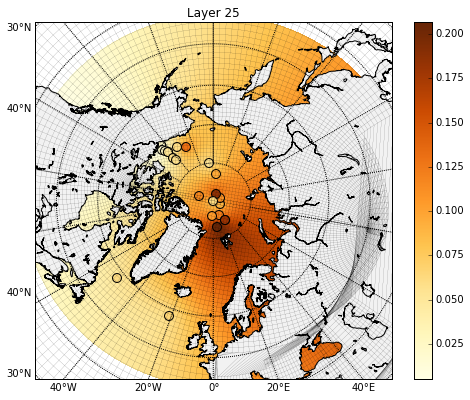

In [25]:
for i in range(26):
    write_nc(i)

#write the nc file

In [26]:
lat = nav_lat
lon = nav_lon
print lat.shape
xmax = lat.shape[1]
ymax = lat.shape[0]
depthtmax = NEMO_dep.shape[0]
print depthtmax
nemo = nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/data_Th_part.nc', 'w')
nemo.description = 'Initial part. Th value' 


# dimensions
nemo.createDimension('x', xmax)
nemo.createDimension('y', ymax)
nemo.createDimension('deptht',depthtmax)
nemo.createDimension('time_counter', None)

# variables
# latitude and longitude
nav_lat = nemo.createVariable('nav_lat','float32',('y','x'),zlib=True)
nav_lat[:,:] = lat[:,:] 
x = nemo.createVariable('nav_lon','float32',('y','x'),zlib=True)
x[:,:]  = lon[:,:] 
# time
time_counter = nemo.createVariable('time_counter', 'float32', ('time_counter'),zlib=True)
time_counter.units = 'non-dim'
time_counter[0] = 1
# depth
depth = nemo.createVariable('deptht', 'float32', ('deptht'),zlib=True)
depth.units = 'meter'
depth[:] = dep[:]


Pa = nemo.createVariable('Th_part', 'float32', ('time_counter','deptht','y','x'), zlib=True)
Pa._units = 'arbitrary'
Pa[:,:,:,:]=Pa_ini[:,:,:,:]
nemo.close()

(149, 182)
31


#test .nc file

In [27]:
import glob,csv
nc_filename=glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/data_Th_part.nc')
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myORCA_offline/EXP00/data_Th_part.nc']


In [28]:
ptrc=nc.Dataset(nc_filename[0])
print ptrc.variables
lat=ptrc.variables['nav_lat'][:]
dept=ptrc.variables['deptht'][:]
Pa_diss=ptrc.variables['Th_part'][:]

OrderedDict([(u'nav_lat', <netCDF4.Variable object at 0x7fa30db00770>), (u'nav_lon', <netCDF4.Variable object at 0x7fa30db00938>), (u'time_counter', <netCDF4.Variable object at 0x7fa30db00f28>), (u'deptht', <netCDF4.Variable object at 0x7fa30db00808>), (u'Th_part', <netCDF4.Variable object at 0x7fa30db00d60>)])


In [29]:
#test input
Pa_diss[0,0,0,0:10]-Pa_ini[0,0,0,0:10]

array([  1.69092573e-09,   1.26449337e-09,  -2.16873973e-09,
        -2.21028350e-09,  -3.39239382e-09,  -1.07560419e-10,
         2.54019504e-09,  -1.64167763e-09,   1.75004333e-09,
         3.37644565e-09])

In [30]:
dept

array([  4.99993801e+00,   1.50002880e+01,   2.50017586e+01,
         3.50054131e+01,   4.50133171e+01,   5.50294991e+01,
         6.50618057e+01,   7.51255112e+01,   8.52503662e+01,
         9.54942856e+01,   1.05969917e+02,   1.16896240e+02,
         1.28697906e+02,   1.42195251e+02,   1.58960617e+02,
         1.81962784e+02,   2.16647919e+02,   2.72476715e+02,
         3.64303040e+02,   5.11534760e+02,   7.32200867e+02,
         1.03321729e+03,   1.40569751e+03,   1.83088501e+03,
         2.28976782e+03,   2.76824243e+03,   3.25747876e+03,
         3.75244214e+03,   4.25040137e+03,   4.74991309e+03,
         5.25022656e+03], dtype=float32)

In [31]:
lat

array([[-78.19058228, -78.19058228, -78.19058228, ..., -78.19058228,
        -78.19058228, -78.19058228],
       [-77.77420044, -77.77420044, -77.77420044, ..., -77.77420044,
        -77.77420044, -77.77420044],
       [-77.34336853, -77.34336853, -77.34336853, ..., -77.34336853,
        -77.34336853, -77.34336853],
       ..., 
       [ 50.51607513,  49.97889328,  50.51607513, ...,  51.18950653,
         50.51607513,  49.97889328],
       [ 50.52545547,  50.        ,  50.52545547, ...,  51.1990509 ,
         50.52545547,  50.        ],
       [ 50.51607513,  49.97889328,  50.51607513, ...,  51.18950653,
         50.51607513,  49.97889328]], dtype=float32)